In [1]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.graph_objects as go
#import plotly.express as px
#from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [3]:
crop = pd.read_csv('crop_data_new.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label,Price_kg,kg_per_acre
0,15.0,62.0,21.0,21.80,63.73,4.35,10.0,lentil,1.12,800
1,17.0,78.0,13.0,29.94,67.31,7.07,10.0,lentil,1.12,800
2,17.0,69.0,19.0,28.50,62.45,8.46,10.0,lentil,1.12,800
3,22.0,81.0,20.0,29.20,68.02,5.05,10.0,lentil,1.12,800
4,19.0,61.0,18.0,25.63,63.15,7.67,10.0,lentil,1.12,800


In [ ]:
crop['label'].unique()

array(['lentil', 'muskmelon', 'watermelon', 'chickpea', 'grapes', 'mango',
       'mungbean', 'banana', 'blackgram', 'orange', 'maize', 'cotton',
       'pomegranate', 'kidneybeans', 'pineapple', 'apple', 'coffee',
       'coconut', 'pigeonpeas', 'mothbeans', 'papaya', 'jute', 'rice'],
      dtype=object)

In [6]:
cf= crop[crop['label'] == 'mango']
av_n= cf['N'].mean()
av_p= cf['P'].mean()
av_k= cf['K'].mean()
total = av_n+av_p+av_k

print("N Ratio:", av_n)
print("P Ratio:", av_p)
print("K Ratio:", av_k)

N Ratio: 19.9
P Ratio: 27.96
K Ratio: 30.53


In [ ]:
cf= crop[crop['label'] == 'pineapple']
av_rain= crop['temperature'].mean()
av_rain

25.568276727789126

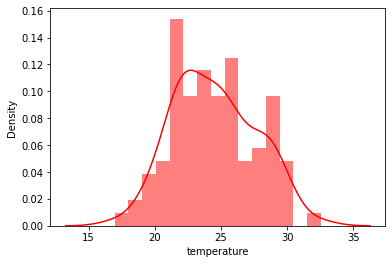

In [ ]:
sns.distplot(cf['temperature'],color="red",bins=15,hist_kws={'alpha':0.5})

[27.44060751 15.8014518  24.29503807 33.5486968  22.55039539 26.92628405
 37.71569462 25.07230146 27.73305384 23.58101886 17.3589249  31.59431213
 24.50642968 23.43515733 19.22104495 30.36470601 25.9380288  31.52799928
 22.13476046 29.666605   24.36781307 29.88251701 28.36762396 25.65105038
 14.24424906 25.79221096 24.2234766  21.52632158 35.22546016 31.54195019
 29.87428035 34.38487791 21.38686788 29.0390112  27.75428811 24.02208817
 31.58356851 30.10334171 25.3335762  33.60808936 19.69840437 24.94904997
 28.58909324 20.87763085 16.58563003 27.44339784 21.7789521  22.53974959
 19.272347   28.16372058 23.10848474 26.56119867 18.66509212 18.96206007
 24.71200106 10.03586112 36.16623993 23.20482203 16.64110555 20.21810244
 26.70907528 24.05519739 11.72293753 23.46133671 32.56490796 31.3258445
 22.05272291 21.23149822 19.47657009 27.67672349 27.71510325 21.73606491
 24.73695698 17.2248921  23.17822958 28.47842625 22.51198011  6.33451925
 36.29301483 35.00936961 30.72455211 32.47654579 31.

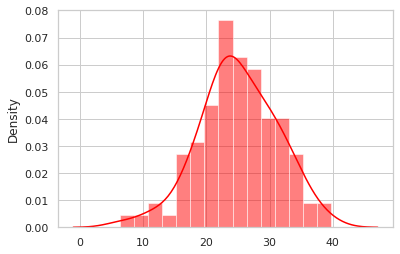

In [ ]:
import numpy as np
  
  
# numpy.random.normal() method
random_array = np.random.normal(24, 6
                              , 100)
# printing 1D array with random numbers
print(random_array)
sns.distplot(random_array,color="red",bins=15,hist_kws={'alpha':0.5})

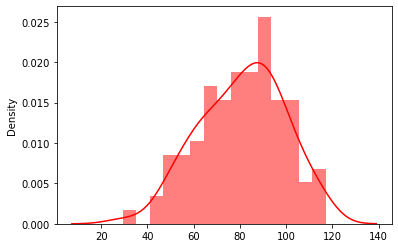

In [ ]:
sns.distplot(random_array,color="red",bins=15,hist_kws={'alpha':0.5})

In [ ]:
cf.count()

N              100
P              100
K              100
temperature    100
humidity       100
ph             100
rainfall       100
label          100
Price_kg       100
kg_per_acre    100
dtype: int64

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall,Price_kg,kg_per_acre
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,54.478696,53.811304,53.811304,25.548465,71.950557,6.385870,108.235748,1.079130,4607.173913
std,41.983861,34.917227,59.225589,5.108068,22.316693,1.472163,56.954042,0.914319,4479.104458
min,4.000000,4.000000,3.000000,8.830000,14.260000,1.620000,10.000000,0.320000,365.000000
25%,21.000000,26.000000,20.000000,22.477500,60.837500,5.457500,66.000000,0.550000,800.000000
50%,33.000000,48.000000,31.000000,25.430000,80.985000,6.375000,101.000000,0.780000,3000.000000
75%,86.000000,70.000000,53.000000,28.540000,90.022500,7.350000,139.000000,1.210000,6500.000000
max,262.000000,222.000000,294.000000,43.680000,99.980000,12.270000,362.000000,4.550000,17700.000000


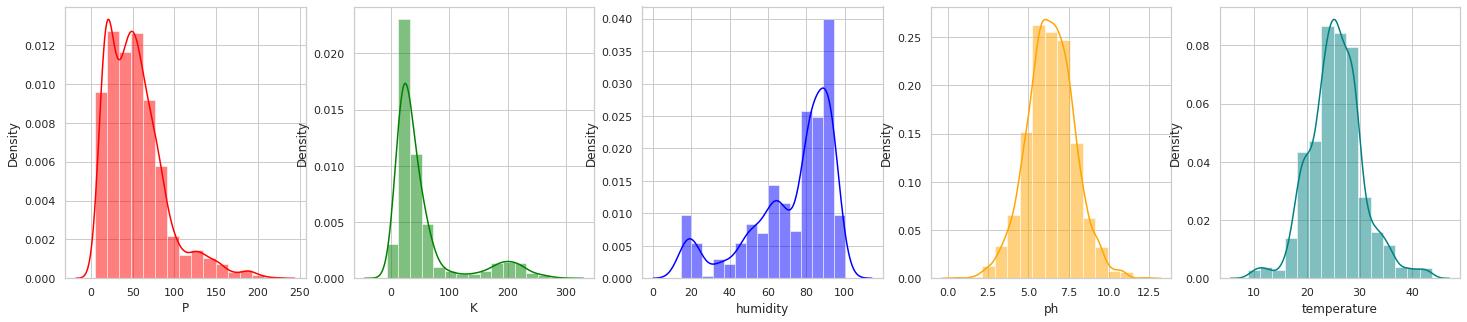

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1, 5, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(crop['P'],color="red",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 5, 2)
sns.distplot(crop['K'],color="green",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 5, 3)
sns.distplot(crop['humidity'],color="blue",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 5, 4)
sns.distplot(crop['ph'],color="orange",bins=15,hist_kws={'alpha':0.5})
plt.subplot(1, 5, 5)
sns.distplot(crop['temperature'],color="teal",bins=15,hist_kws={'alpha':0.5})

LinAlgError: ignored

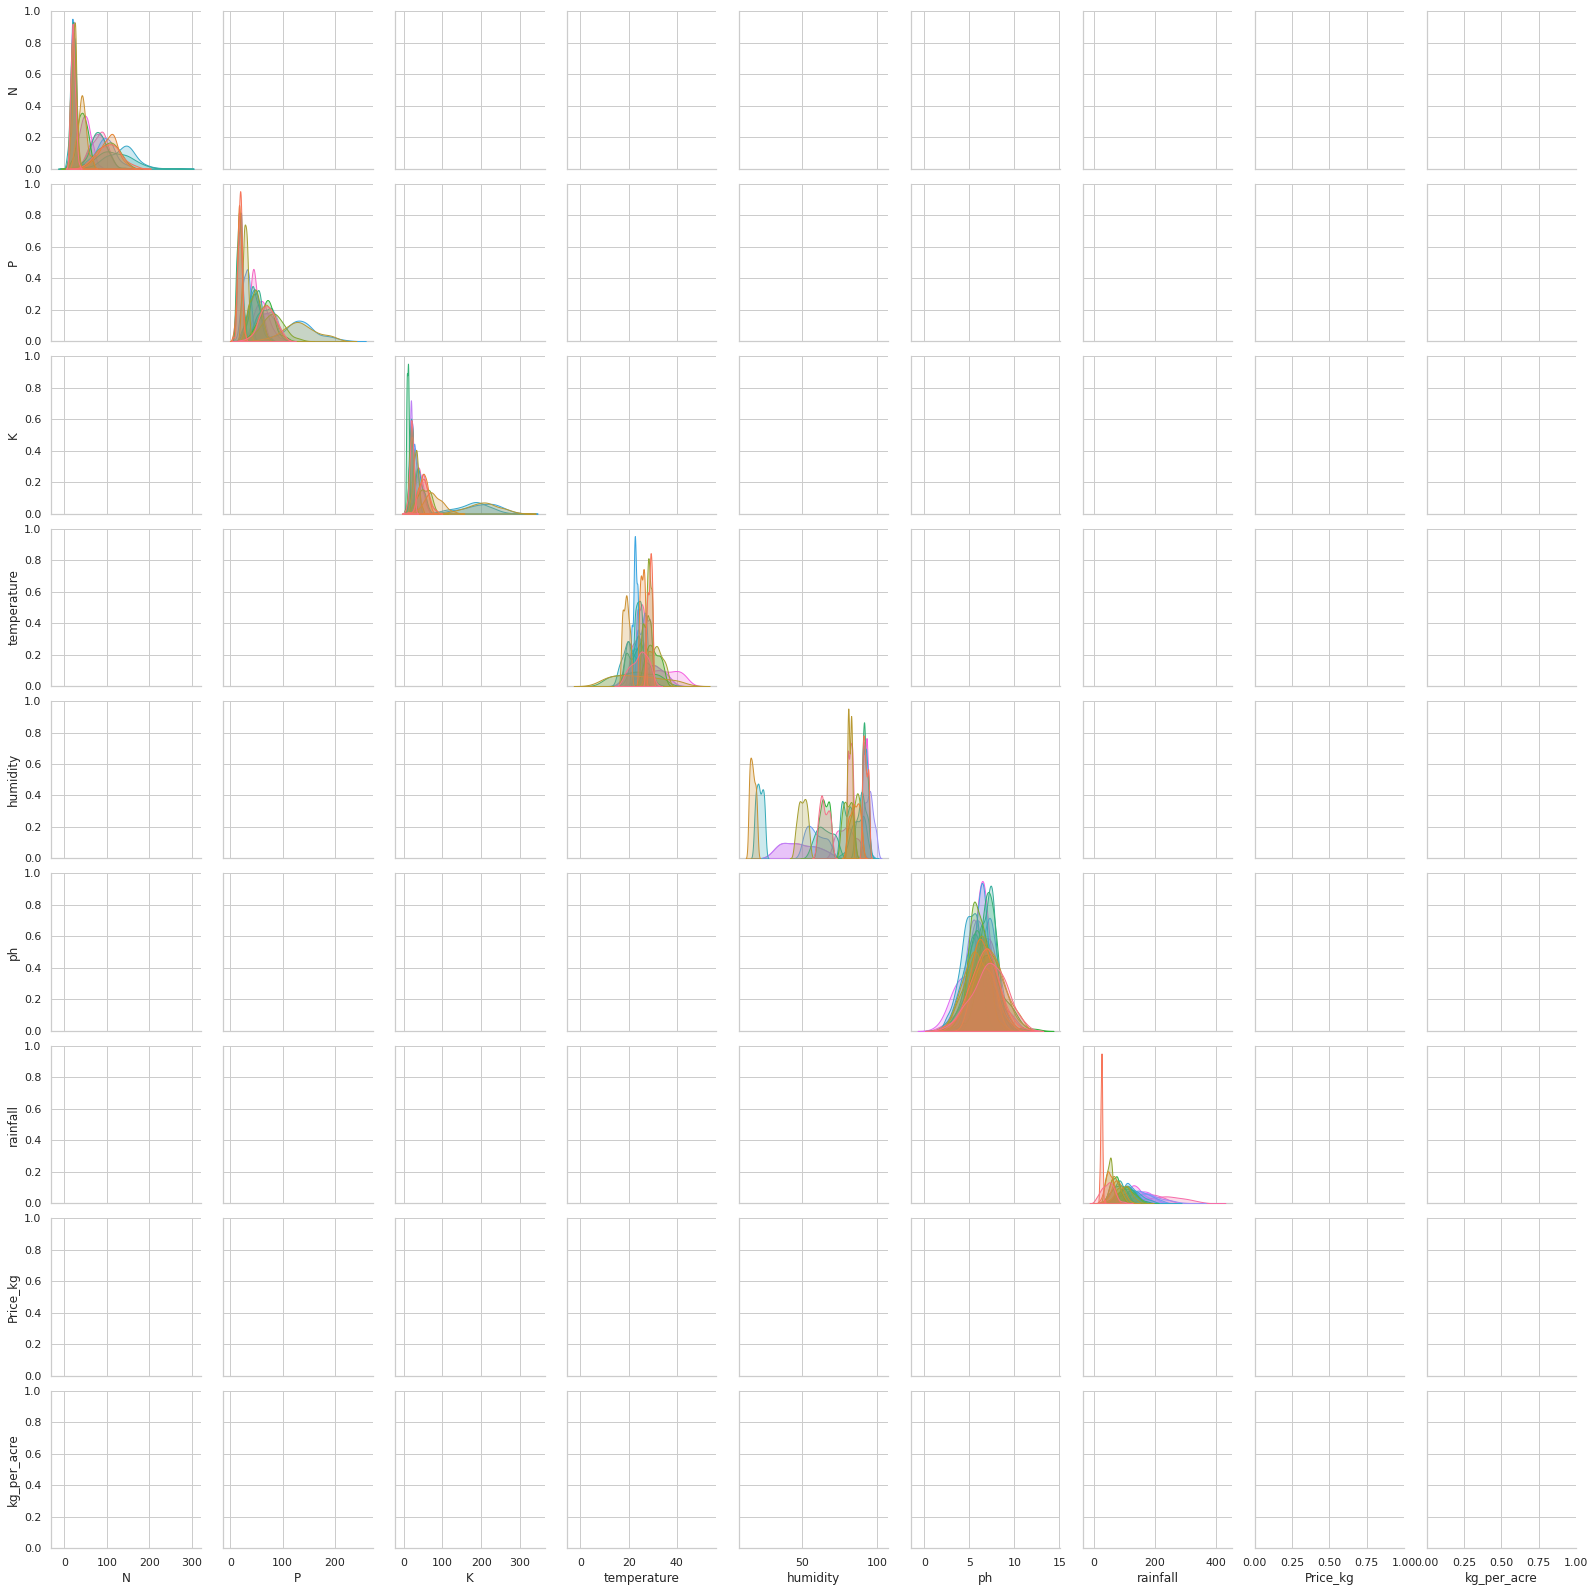

In [ ]:
sns.pairplot(crop,hue = 'label')

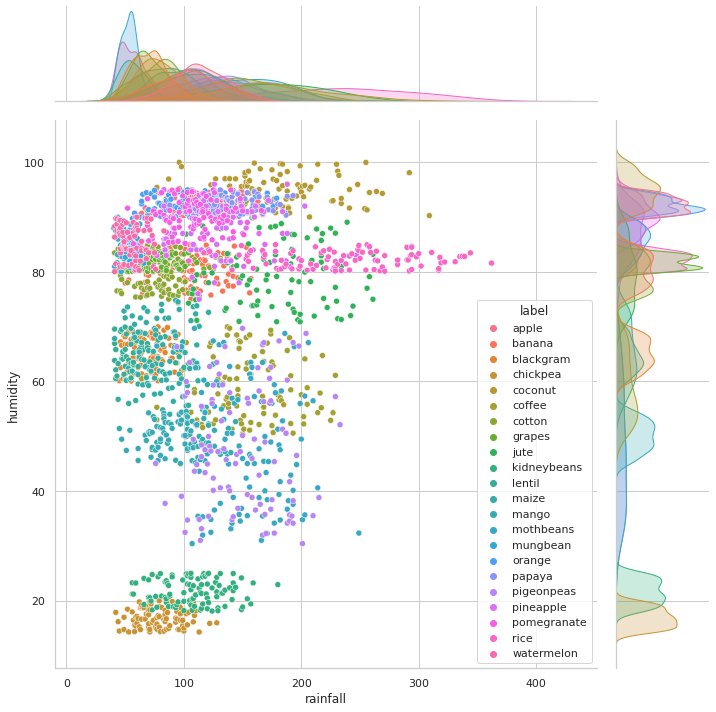

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=crop[(crop['temperature']<40) & 
                                                  (crop['rainfall']>40)],height=10,hue="label")

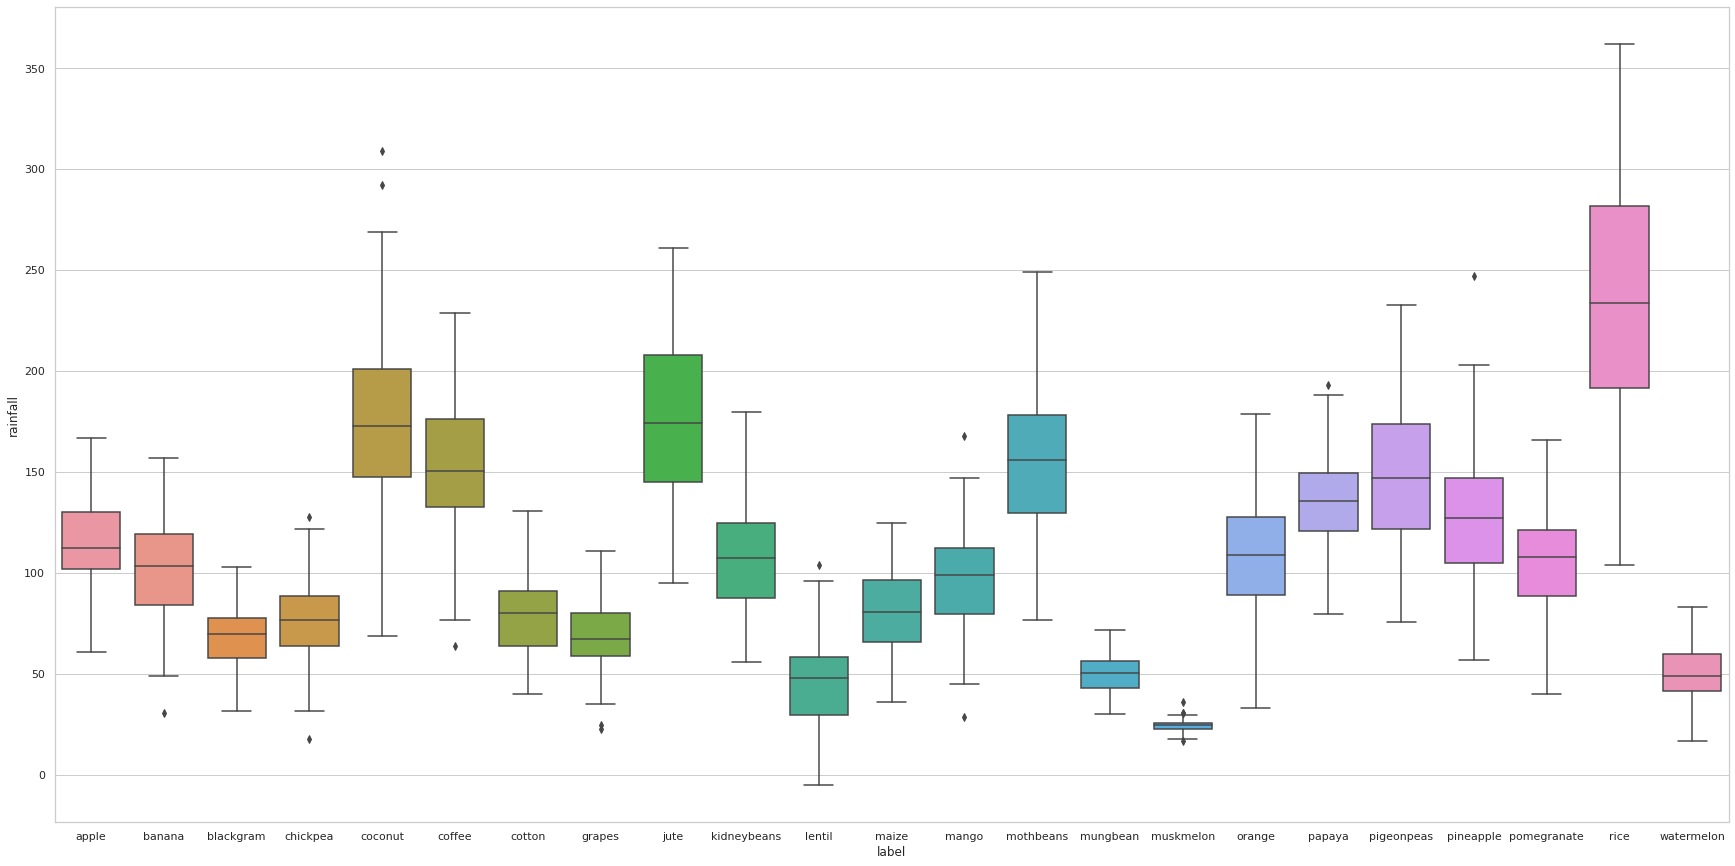

In [ ]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(30,15))
sns.boxplot(x='label',y='rainfall',data=crop)

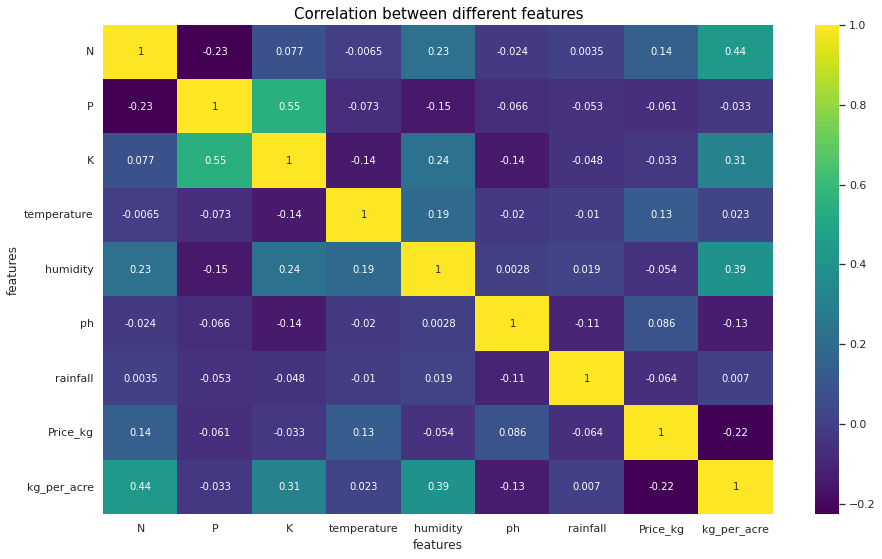

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

# KNN Model

In [4]:
features = crop[['N', 'P','K','temperature','humidity','ph','rainfall']]
target= crop['label']

acc = []
model = []

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(features, target, test_size =0.2, random_state =2)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x=metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('KNN')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))


KNN Accuracy is:  0.8543478260869565
              precision    recall  f1-score   support

       apple       0.84      0.81      0.82        26
      banana       0.95      0.90      0.93        21
   blackgram       0.60      0.90      0.72        10
    chickpea       1.00      0.95      0.97        19
     coconut       1.00      0.92      0.96        26
      coffee       0.85      0.92      0.88        12
      cotton       0.79      0.86      0.83        22
      grapes       0.82      0.88      0.85        26
        jute       0.45      0.50      0.47        18
 kidneybeans       0.96      1.00      0.98        23
      lentil       0.88      0.82      0.85        17
       maize       0.88      0.64      0.74        22
       mango       0.95      1.00      0.98        21
   mothbeans       0.53      0.56      0.55        16
    mungbean       0.95      1.00      0.98        20
   muskmelon       0.90      1.00      0.95        19
      orange       0.96      1.00      0.98 

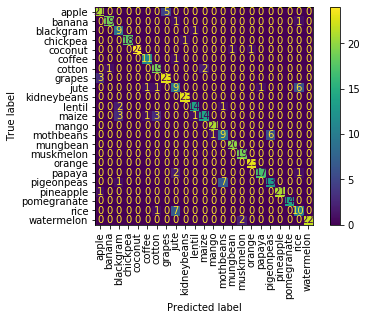

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
#fig, ax = plt.subplots(1, 1, figsize=(15, 9))

plot_confusion_matrix(knn, x_test, y_test) 

plt.xticks(rotation=90)
plt.figure(figsize=(8,6), dpi=80)
#disp.plot()
plt.show()

In [8]:
score = cross_val_score(knn, features, target, cv=5)
print("cross Val Score: ",score)

cross Val Score:  [0.61521739 0.80652174 0.82173913 0.8326087  0.61304348]


In [14]:

import joblib
 
# Save the model as a pickle in a file
joblib.dump(knn, 'models/knn.pkl')

['models/knn.pkl']

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.85
              precision    recall  f1-score   support

       apple       0.85      0.88      0.87        26
      banana       1.00      0.81      0.89        21
   blackgram       0.80      0.80      0.80        10
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      0.96      0.98        26
      coffee       0.86      1.00      0.92        12
      cotton       0.86      0.86      0.86        22
      grapes       0.88      0.85      0.86        26
        jute       0.57      0.67      0.62        18
 kidneybeans       0.92      0.96      0.94        23
      lentil       0.93      0.76      0.84        17
       maize       0.62      0.59      0.60        22
       mango       1.00      0.95      0.98        21
   mothbeans       0.40      0.75      0.52        16
    mungbean       0.91      1.00      0.95        20
   muskmelon       0.90      0.95      0.92        19
      orange       1.00      1.00      1

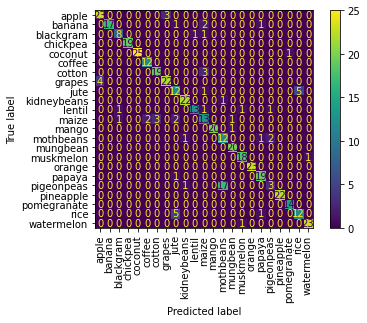

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(LogReg, x_test, y_test)  
plt.xticks(rotation=90)
plt.show()

In [17]:
# Save the model as a pickle in a file
joblib.dump(LogReg, 'models/LogReg.pkl')

['models/LogReg.pkl']

# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test,predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test, predicted_values))

Random Forest Accuracy is:  0.9326086956521739
              precision    recall  f1-score   support

       apple       0.96      1.00      0.98        26
      banana       1.00      0.90      0.95        21
   blackgram       1.00      0.90      0.95        10
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        26
      coffee       0.85      0.92      0.88        12
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        26
        jute       0.74      0.78      0.76        18
 kidneybeans       1.00      1.00      1.00        23
      lentil       0.83      0.88      0.86        17
       maize       0.91      0.91      0.91        22
       mango       0.95      0.95      0.95        21
   mothbeans       0.65      0.69      0.67        16
    mungbean       1.00      1.00      1.00        20
   muskmelon       0.95      1.00      0.97        19
      orange       1.00      1.00 

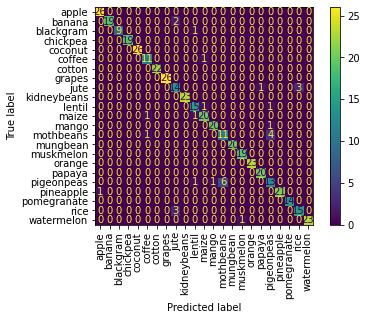

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(RF, x_test, y_test)
plt.xticks(rotation=90)
plt.show()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [ ]:
score = cross_val_score(RF, features, target, cv=5)
print('Cross validation score: ', score)

Cross validation score:  [0.77826087 0.89565217 0.92826087 0.92391304 0.77608696]


In [26]:
# Save the model as a pickle in a file
#joblib.dump(RF, 'models/RF.pkl')

['models/RF.pkl']

In [31]:
with open('models/RF_pkl', 'wb') as files:
    pickle.dump(RF, files)

In [29]:
with open('models/RF_pkl' , 'rb') as f:
    rf = pickle.load(f)

In [30]:
rf.predict([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])

array(['coffee'], dtype=object)

# XGBoost

In [20]:
import xgboost as xgb
XB= xgb.XGBClassifier()
XB.fit(x_train, y_train)

predicted_values = XB.predict(x_test)

x=metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('XGBoost')
print('XGBoost Accuracy is: ', x)
print(classification_report(y_test, predicted_values))

ModuleNotFoundError: No module named 'xgboost'

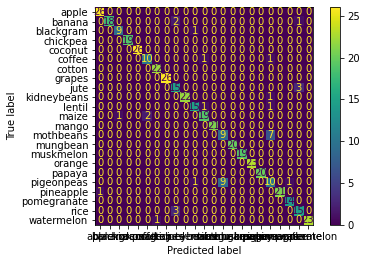

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(XB, x_test, y_test)  
plt.show()

In [ ]:
score = cross_val_score(XB,features, target, cv=5)
print('Cross validation score: ', score)

Cross validation score:  [0.75652174 0.89130435 0.92826087 0.91086957 0.66086957]


# NN

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
crop_nn= crop[['N','P'	,'K',	'temperature',	'humidity',	'ph',	'rainfall',	'label']]
crop_nn['label'] = label_encoder.fit_transform(crop_nn['label'])

In [22]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
crop_scaled = pd.DataFrame(ss.fit_transform(crop_nn.iloc[:, :-1]))

In [23]:
x = crop_scaled
y = crop_nn.iloc[:, -1]

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 ,
                                                            random_state=111)

x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train,
                                                            test_size=0.2,
                                                            random_state=111)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier = Sequential()
classifier.add(Dense(units=10, input_dim=7, activation='relu'))
classifier.add(Dense(units=14, activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units=18, activation='relu'))
classifier.add(Dense(units=20, activation='relu'))
classifier.add(Dense(units=23, activation='sigmoid'))
classifier.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])
classifier.summary()

ModuleNotFoundError: No module named 'keras'

In [ ]:
run_model = classifier.fit(x_train, y_train, 
                           batch_size = 32, 
                           epochs= 100, 
                           verbose = 1, 
                           validation_data = (x_validate, y_validate,))

Epoch 1/100
46/46 [==============================] - 1s 7ms/step - loss: 3.1339 - accuracy: 0.0605 - val_loss: 3.0951 - val_accuracy: 0.0951
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 3.0619 - accuracy: 0.1148 - val_loss: 3.0158 - val_accuracy: 0.1630
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 2.9545 - accuracy: 0.1488 - val_loss: 2.8454 - val_accuracy: 0.2011
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 2.7461 - accuracy: 0.1841 - val_loss: 2.5410 - val_accuracy: 0.2201
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 2.4286 - accuracy: 0.2459 - val_loss: 2.1706 - val_accuracy: 0.3098
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 2.1397 - accuracy: 0.2955 - val_loss: 1.8330 - val_accuracy: 0.3777
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 1.9096 - accuracy: 0.3322 - val_loss: 1.5894 - val_accuracy: 0.4049
Epoch 8/100
4

In [ ]:
eval = classifier.evaluate(x_test,y_test)
acc.append(eval[-1])
model.append('Neural Network')

15/15 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8370


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)  
plt.show()

ValueError: ignored

In [ ]:
eval

[0.4308182895183563, 0.8608695864677429]

# Model Accuracy Comparison

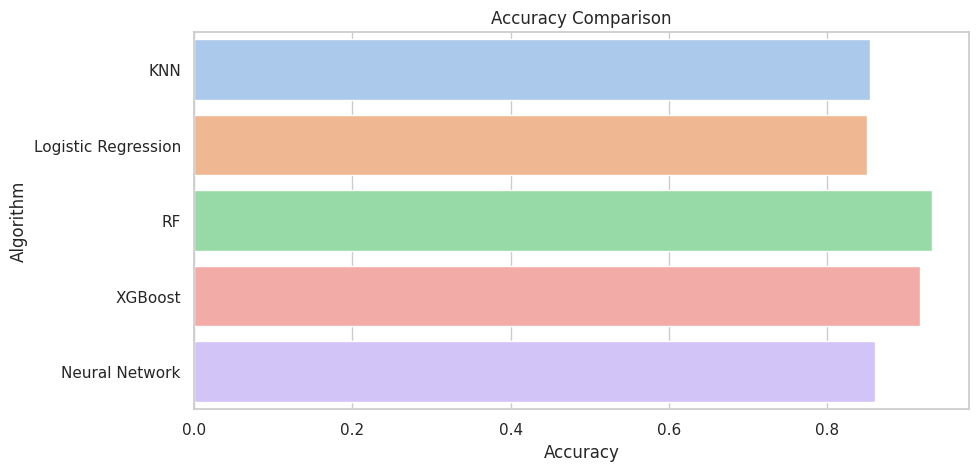

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='pastel')